In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
pd.options.display.max_columns= None
pd.options.display.max_rows= None
np.set_printoptions(suppress=True)

In [4]:
mobile=pd.read_csv(r'D:\ml\knn\Mobile_data.csv')
mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
mobile.shape


(2000, 15)

In [6]:
mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [7]:
mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [8]:
fea = mobile.iloc[:,mobile.columns!='price_range']
target = mobile.iloc[:,mobile.columns== 'price_range']

In [9]:
fea.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


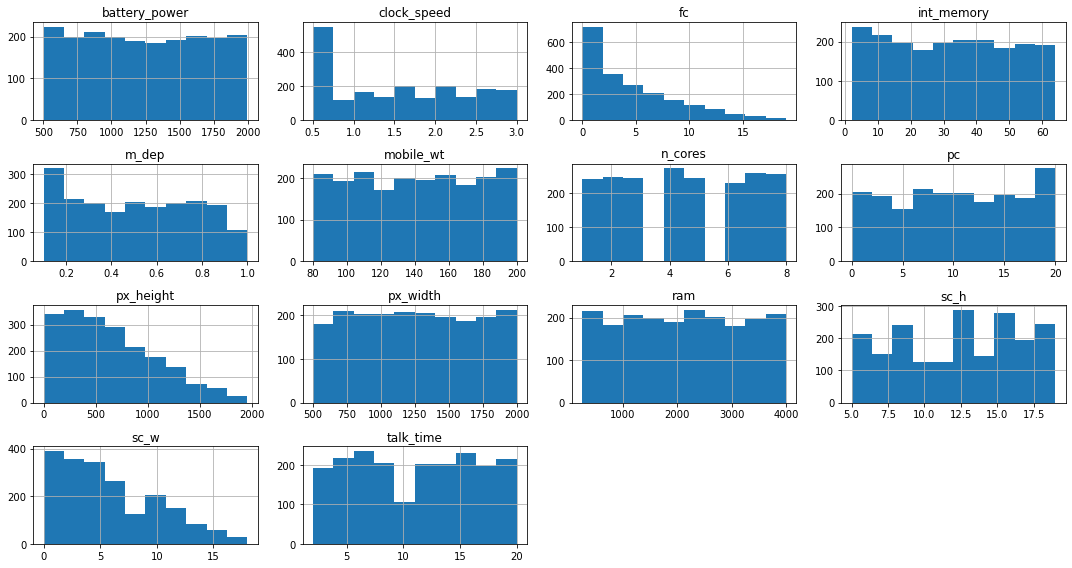

In [10]:
fea.hist()
plt.tight_layout()
plt.show()

In [11]:
freq = target.price_range.value_counts()
freq

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

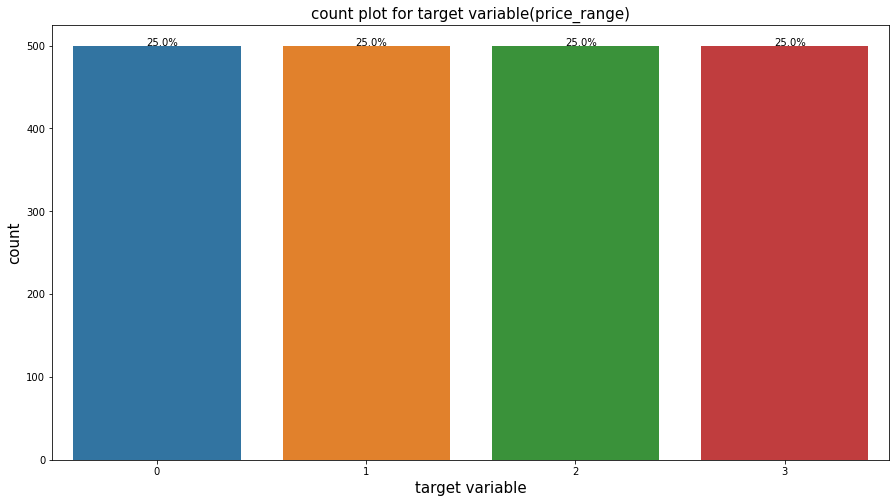

In [12]:
sns.countplot(x=target.price_range)
plt.text(x=-0.05, y= target.price_range.value_counts()[0],s=str((freq[0])*100/len(target.price_range))+'%')
plt.text(x=0.95, y= target.price_range.value_counts()[1],s=str((freq[1])*100/len(target.price_range))+'%')
plt.text(x=1.95, y= target.price_range.value_counts()[2],s=str((freq[2])*100/len(target.price_range))+'%')
plt.text(x=2.95, y= target.price_range.value_counts()[3],s=str((freq[3])*100/len(target.price_range))+'%')
plt.title('count plot for target variable(price_range)',fontsize=15)
plt.xlabel('target variable',fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [13]:
price_group = mobile.groupby('price_range')

In [14]:
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='ram'>

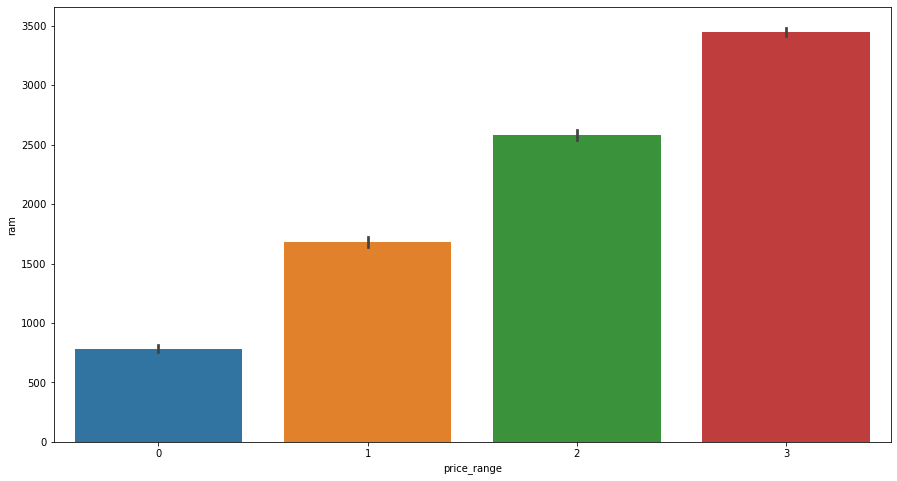

In [15]:
sns.barplot('price_range','ram', data=mobile)

In [16]:
corrmat=fea.corr()
corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


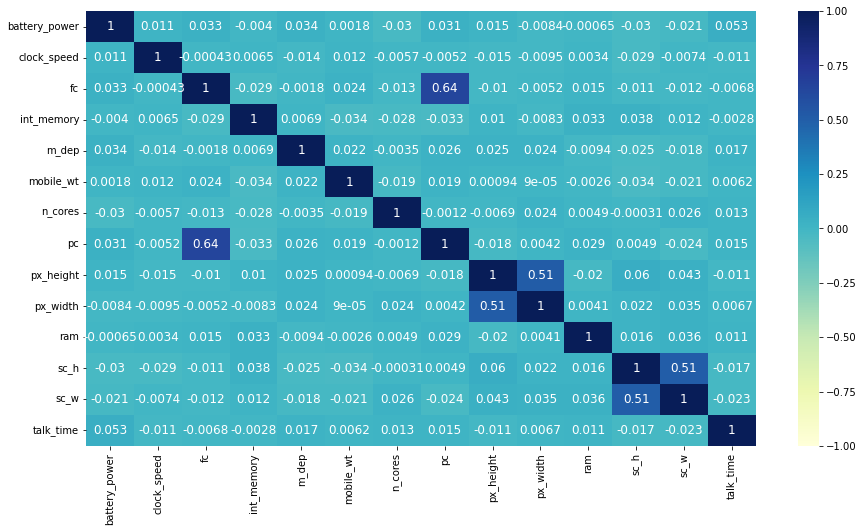

In [17]:
sns.heatmap(corrmat,cmap='YlGnBu',vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size":12})
plt.show()

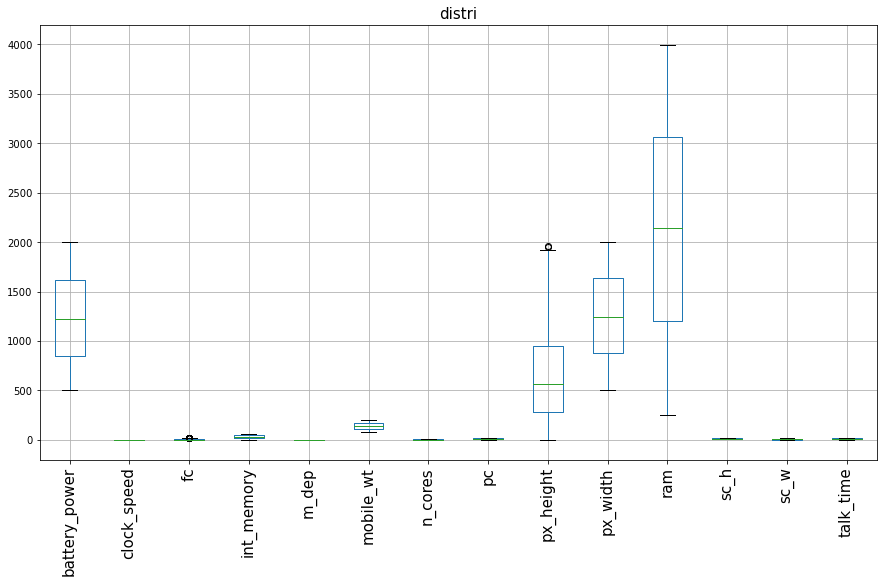

In [18]:
fea.boxplot()
plt.title('distri',fontsize=15)
plt.xticks(rotation="vertical",fontsize=15)
plt.show()

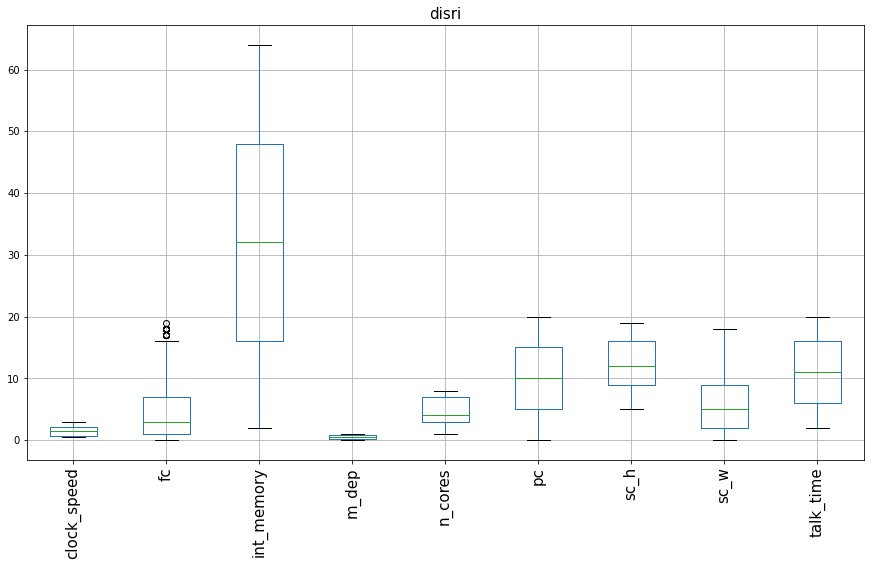

In [19]:
fea.drop(['battery_power','mobile_wt', 'px_height', 'px_width', 'ram'], axis=1).boxplot()
plt.title('disri', fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

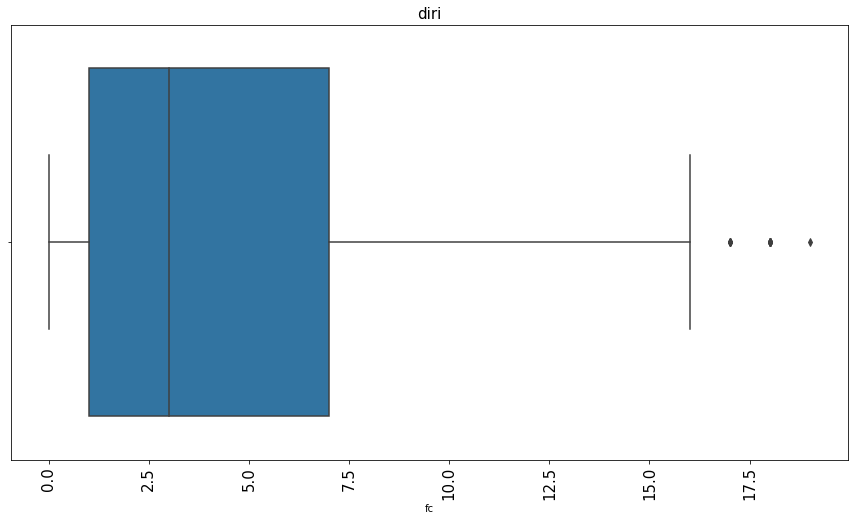

In [20]:
sns.boxplot(mobile['fc'])
plt.title('diri',fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

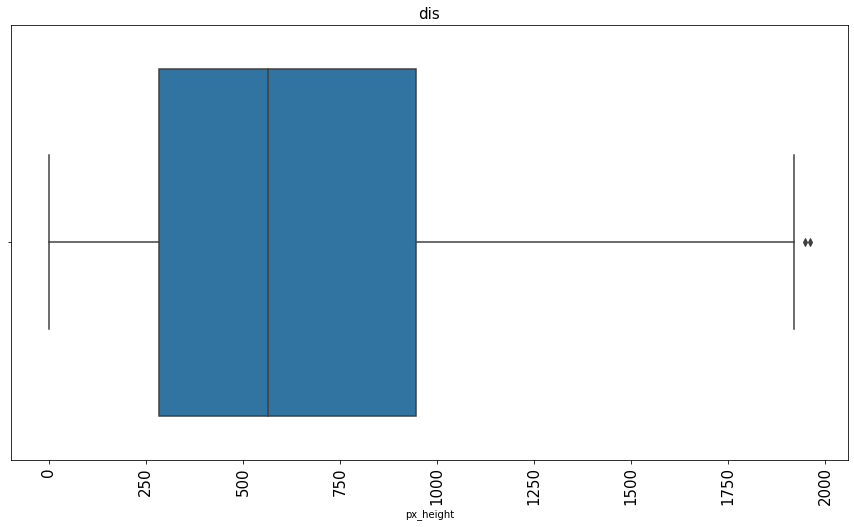

In [21]:
sns.boxplot(mobile['px_height'])
plt.title('dis',fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [22]:
q1 =fea.quantile(0.25)
q3=fea.quantile(0.75)
iqr = q3-q1
print(iqr)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [23]:
mobile =mobile[~((mobile< (q1-1.5*iqr))|(mobile>(q3+1.5*iqr))).any(axis=1)]
mobile=mobile.reset_index(drop=True)

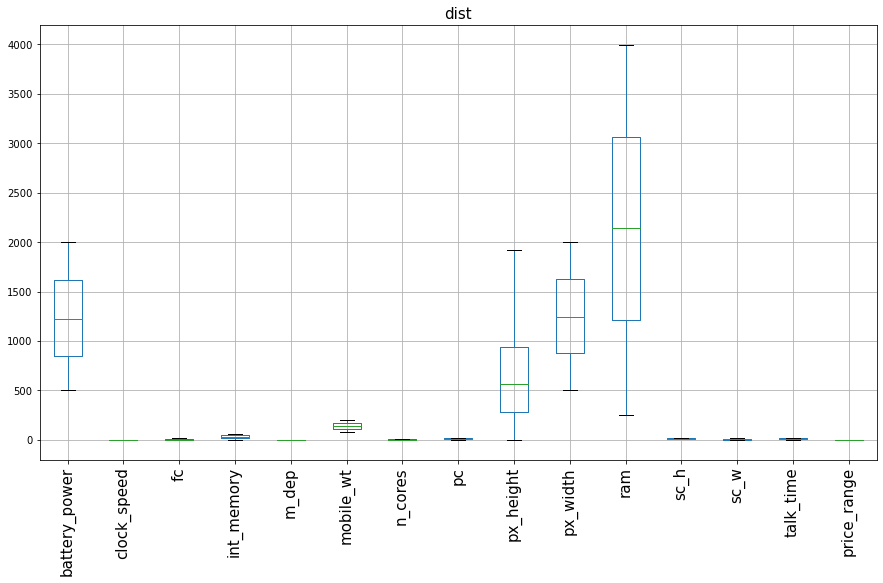

In [24]:
mobile.boxplot()
plt.title('dist',fontsize=15)
plt.xticks(rotation = 'vertical', fontsize=15)
plt.show()

In [25]:
mobile.shape

(1980, 15)

In [26]:
total = mobile.isnull().sum().sort_values(ascending=False)
percent=(mobile.isnull().sum()*100/mobile.isnull().count()).sort_values(ascending=False)
miss=pd.concat([total,percent],axis=1,keys = ['total','percnt'])
miss

,total,percnt
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


In [27]:
y=mobile.price_range
mobile=mobile.drop('price_range',axis=1)

In [28]:
df_num=mobile.apply(lambda rec: (rec- rec.mean())/rec.std())
df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [29]:
x=df_num.copy()
x.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [30]:
def get_test_report(model):
    y_pred=model.predict(x_test)
    return(classification_report(y_test,y_pred))

In [31]:
def plot_con_mat(model):
    y_pred=model.predict(x_test)
    cm= confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1','predicted:2',
                                             'predicted:3'],\
                            index=['actual:0','actual:1','actual:2','actual:3'])
    sns.heatmap(conf_matrix,annot=True , fmt ="d" , cmap=ListedColormap(['lightskyblue']),
               cbar=False , linewidths=0.1 , annot_kws={'size':25})
    plt.xticks(fontsize =20)
    plt.yticks(fontsize =20)
    plt.show()

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y , test_size=0.30 , random_state=10)
print('x_train',x_train.shape)
print('y_train', y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (1386, 14)
y_train (1386,)
x_test (594, 14)
y_test (594,)


In [33]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_model= knn.fit(x_train,y_train)

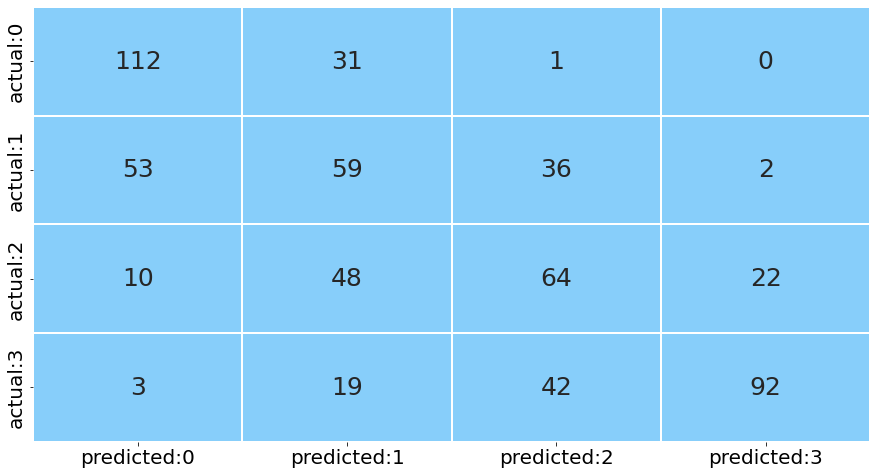

In [34]:
plot_con_mat(knn)

In [35]:
get=get_test_report(knn_model)
print(get)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



In [36]:
tuned = {'n_neighbors': np.arange(1,25,2),
        'metric':['hamming','euclidean','manhattan','Chebyshev']}
knn_classification= KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_classification,
                     param_grid = tuned,
                     cv=5,
                     scoring='accuracy')
knn_grid.fit(x_train,y_train)
print('best',knn_grid.best_params_,'\n')

best {'metric': 'manhattan', 'n_neighbors': 21} 



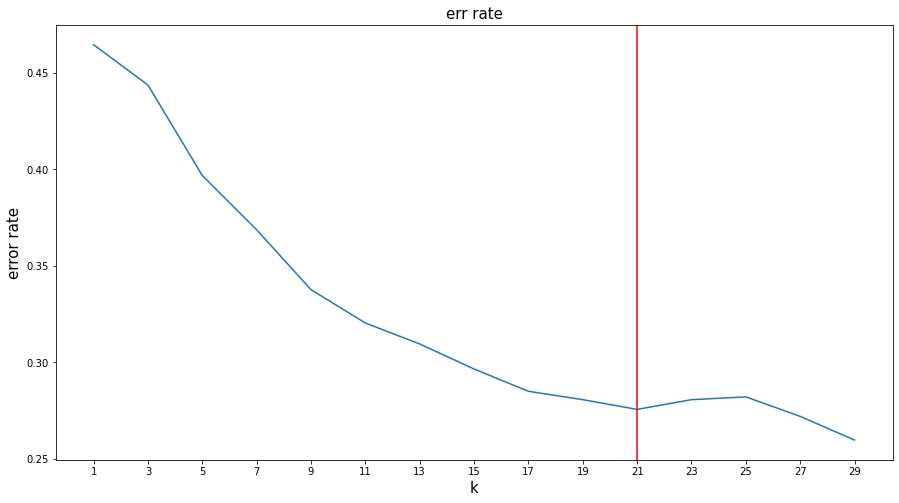

In [40]:
error_rate=[]
for i in np.arange(1,30,2):
    knn=KNeighborsClassifier(i, metric ="manhattan")
    score = cross_val_score(knn,x_train,y_train,cv=5)
    score=score.mean()
    error_rate.append(1-score)
plt.plot(range(1,30,2),error_rate)
plt.title('err rate',fontsize=15)
plt.xlabel("k", fontsize=15)
plt.ylabel('error rate' , fontsize=15)
plt.xticks(np.arange(1,30,step=2))
plt.axvline(x=21, color="red")
plt.show()

In [41]:
print(get_test_report(knn_grid))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.64      0.60      0.62       150
           2       0.59      0.67      0.62       144
           3       0.87      0.71      0.78       156

    accuracy                           0.71       594
   macro avg       0.72      0.71      0.71       594
weighted avg       0.72      0.71      0.71       594



In [42]:
y_pred =knn_grid.predict(x_test)

In [44]:
kapp = cohen_kappa_score(y_test,y_pred)
print(kapp)

0.6121164081078021
